# Task 3
###Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.
## Bank Marketing
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

import the necessary Python libraries.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


 Load the Dataset

In [3]:
# Load the dataset
# upload 'bank-full.csv' to your Colab environment first
df = pd.read_csv('/content/drive/MyDrive/Prodigy internship /bank-full.csv', sep=';')


Data Preprocessing

The dataset contains categorical features that need to be converted into numerical format. We'll use LabelEncoder for binary categorical features and pd.get_dummies for multi-class categorical features.

In [4]:
# Display initial columns and their types
print("Original DataFrame Info:")
df.info()
print("\nOriginal DataFrame Head:")
print(df.head())

# Separate target variable
X = df.drop('y', axis=1)
y = df['y']

# Convert binary target variable 'y' to numerical (no=0, yes=1)
y = y.map({'no': 0, 'yes': 1})

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply one-hot encoding to all remaining categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display processed DataFrame info and head
print("\nProcessed DataFrame Info:")
X.info()
print("\nProcessed DataFrame Head:")
print(X.head())


Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Original DataFrame Head:
   age           job  marital  education default

**Split Data into Training and Testing Sets**

Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Target variable distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Target variable distribution in testing set:\n{y_test.value_counts(normalize=True)}")



Training set shape: (31647, 42)
Testing set shape: (13564, 42)
Target variable distribution in training set:
y
0    0.883022
1    0.116978
Name: proportion, dtype: float64
Target variable distribution in testing set:
y
0    0.882999
1    0.117001
Name: proportion, dtype: float64


### Build and Train the Decision Tree Classifier

In [6]:
# Initialize the Decision Tree Classifier

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5) # Limiting depth for better visualization and to prevent overfitting

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

### Make Predictions and Evaluate the Model

In [7]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model Evaluation:
Accuracy: 0.9003

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11977
           1       0.66      0.30      0.41      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564


Confusion Matrix:
[[11733   244]
 [ 1109   478]]


### Visualize the Decision Tree

Visualizing the decision tree can help understand how the model makes decisions.

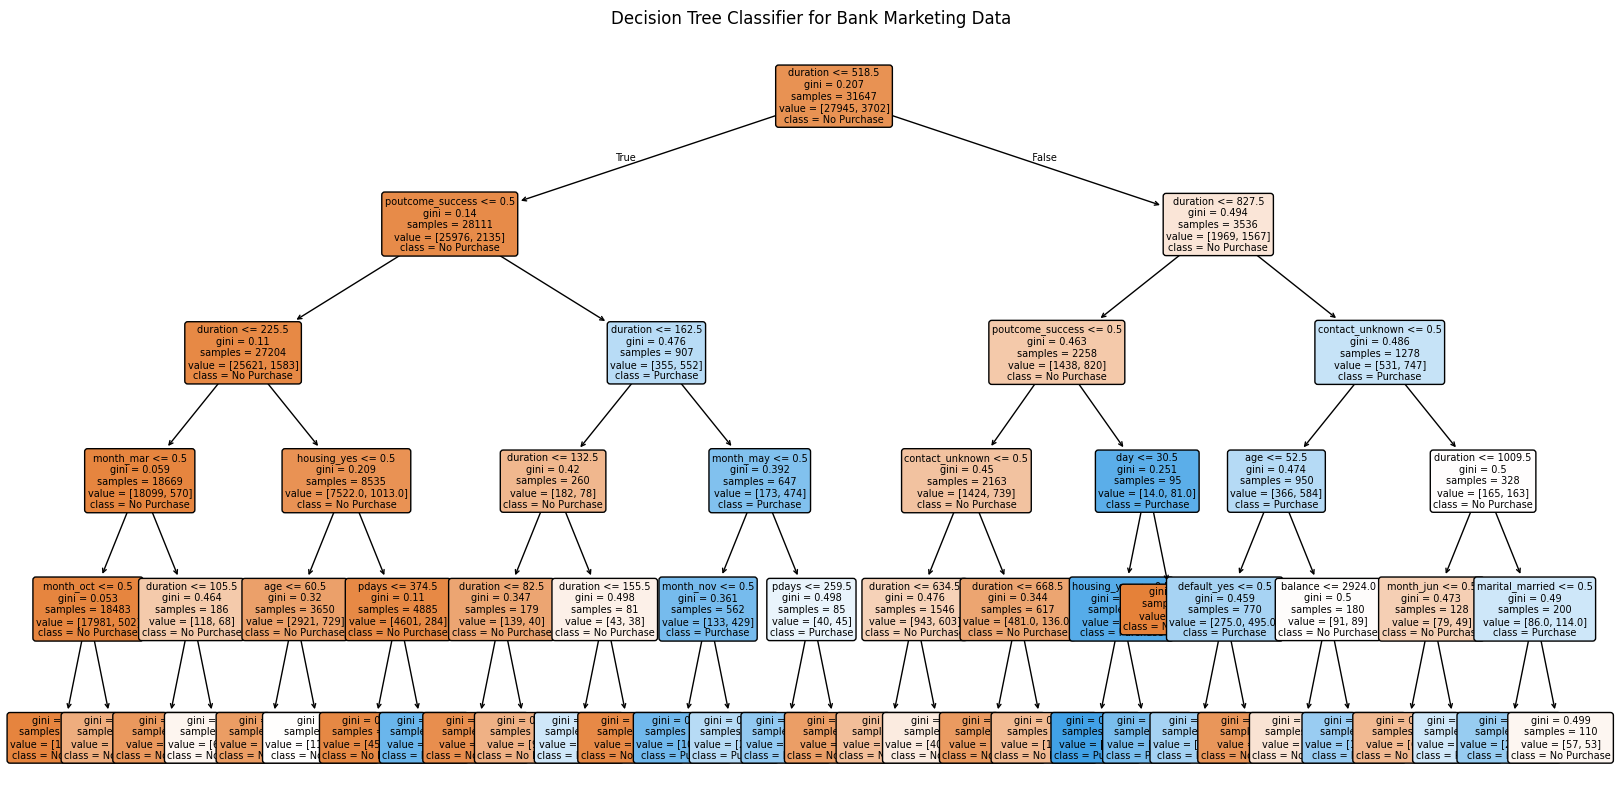


Feature Importances:
duration               0.561111
poutcome_success       0.285862
housing_yes            0.042285
age                    0.025002
pdays                  0.021021
month_mar              0.020814
contact_unknown        0.015859
month_oct              0.013694
month_may              0.003987
marital_married        0.001876
balance                0.001806
month_jun              0.001753
default_yes            0.001743
month_nov              0.001721
day                    0.001466
campaign               0.000000
job_blue-collar        0.000000
previous               0.000000
job_housemaid          0.000000
job_entrepreneur       0.000000
job_unknown            0.000000
job_management         0.000000
job_student            0.000000
job_retired            0.000000
job_self-employed      0.000000
job_services           0.000000
loan_yes               0.000000
education_unknown      0.000000
education_secondary    0.000000
education_tertiary     0.000000
marital_single    

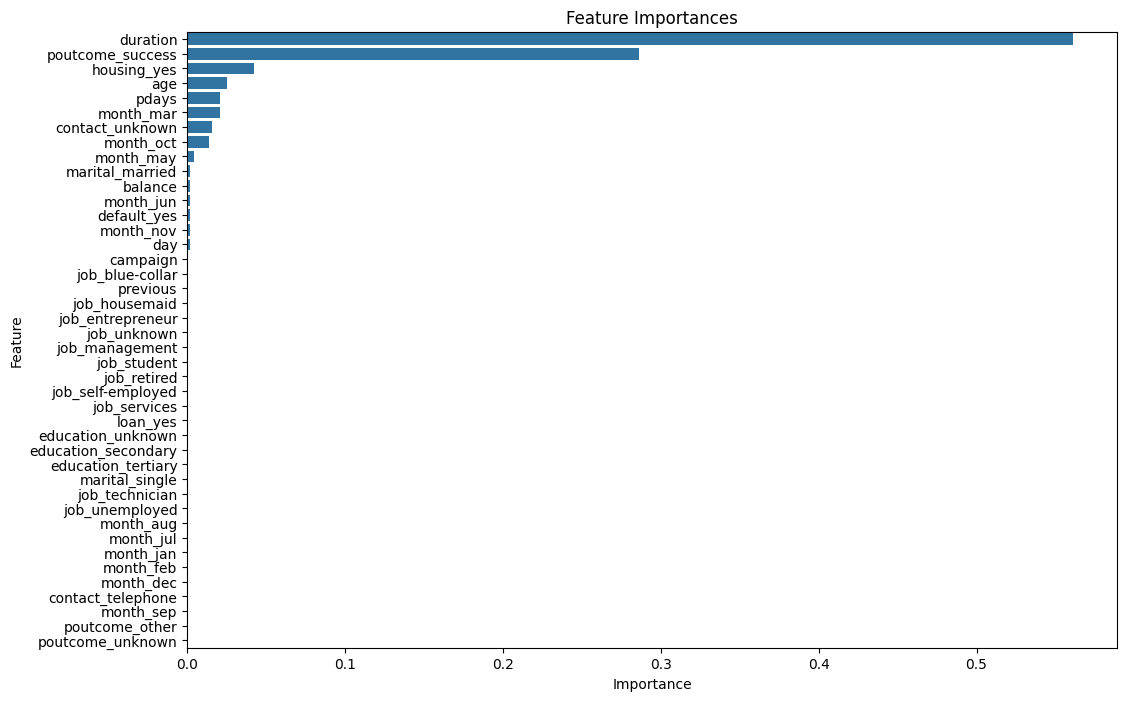

In [8]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=X.columns.tolist(),
          class_names=['No Purchase', 'Purchase'],
          filled=True,
          rounded=True,
          fontsize=7)
plt.title("Decision Tree Classifier for Bank Marketing Data")
plt.show()

# Optional: Feature Importance
print("\nFeature Importances:")
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
